# **Project Description: Data Wrangling for Customer Analytics at XYZ Company**
Project Title: Data Wrangling for Enhanced Customer Analytics at XYZ Company
Objective: The primary goal of this project is to perform comprehensive data wrangling to prepare a robust dataset for customer analytics at XYZ Company. By cleaning, transforming, and consolidating data from various sources, the project aims to enhance the accuracy and usability of customer data for subsequent analysis and reporting.
Background: XYZ Company has accumulated customer data from multiple channels, including sales transactions, customer service interactions, and marketing campaigns. However, this data is often inconsistent, incomplete, or fragmented, making it challenging to derive meaningful insights. Effective data wrangling will facilitate better decision-making and more targeted marketing strategies.


In [3]:
import kagglehub
import os
import pandas as pd

# Download dataset from Kaggle
dataset_path = kagglehub.dataset_download("aungpyaeap/supermarket-sales")

# List all files in the downloaded dataset folder
print("Files in dataset directory:", os.listdir(dataset_path))

# Load dataset (update filename based on directory contents)
file_name = [f for f in os.listdir(dataset_path) if f.endswith('.csv')][0]  # Find the correct CSV file
file_path = os.path.join(dataset_path, file_name)

df = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Loaded Successfully!")
print(df.head())

Files in dataset directory: ['supermarket_sales - Sheet1.csv']
Dataset Loaded Successfully!
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Ra

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5percent             1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

In [4]:
# Import necessary libraries
import pandas as pd

# Load dataset again (if needed)
file_path = os.path.join(dataset_path, 'supermarket_sales - Sheet1.csv')
df = pd.read_csv(file_path)

# Standardize column names (remove spaces and special characters)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'percent')

# Convert 'Date' to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Convert 'Time' to a proper time format
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.time

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Remove duplicates (if any)
df = df.drop_duplicates()

# Save cleaned dataset
cleaned_file_path = "/content/cleaned_supermarket_sales.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")
print("Data Cleaning Completed Successfully!")


Missing Values:
 invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5percent               0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64
Cleaned dataset saved at: /content/cleaned_supermarket_sales.csv
Data Cleaning Completed Successfully!


In [5]:
print(df.describe())


        unit_price     quantity  tax_5percent        total  \
count  1000.000000  1000.000000   1000.000000  1000.000000   
mean     55.672130     5.510000     15.379369   322.966749   
min      10.080000     1.000000      0.508500    10.678500   
25%      32.875000     3.000000      5.924875   124.422375   
50%      55.230000     5.000000     12.088000   253.848000   
75%      77.935000     8.000000     22.445250   471.350250   
max      99.960000    10.000000     49.650000  1042.650000   
std      26.494628     2.923431     11.708825   245.885335   

                             date        cogs  gross_margin_percentage  \
count                        1000  1000.00000             1.000000e+03   
mean   2019-02-14 00:05:45.600000   307.58738             4.761905e+00   
min           2019-01-01 00:00:00    10.17000             4.761905e+00   
25%           2019-01-24 00:00:00   118.49750             4.761905e+00   
50%           2019-02-13 00:00:00   241.76000             4.761905e+00 

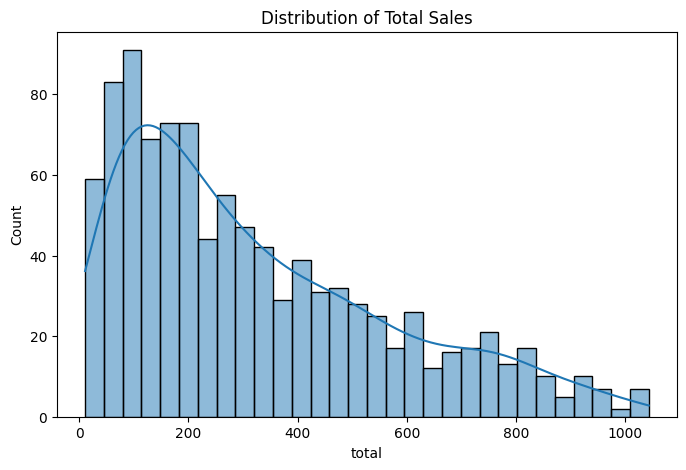

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of total sales
plt.figure(figsize=(8,5))
sns.histplot(df['total'], bins=30, kde=True)
plt.title("Distribution of Total Sales")
plt.show()


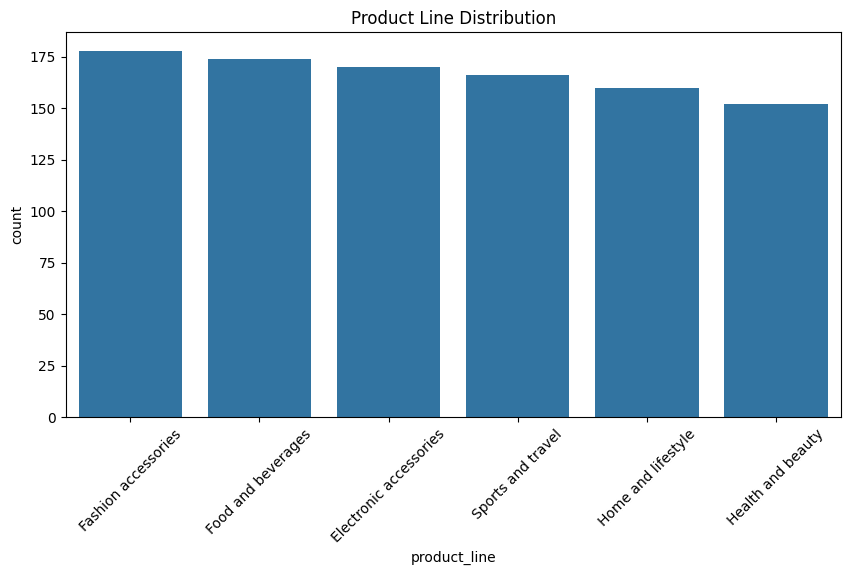

In [7]:
# Count of each product line
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="product_line", order=df['product_line'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Product Line Distribution")
plt.show()

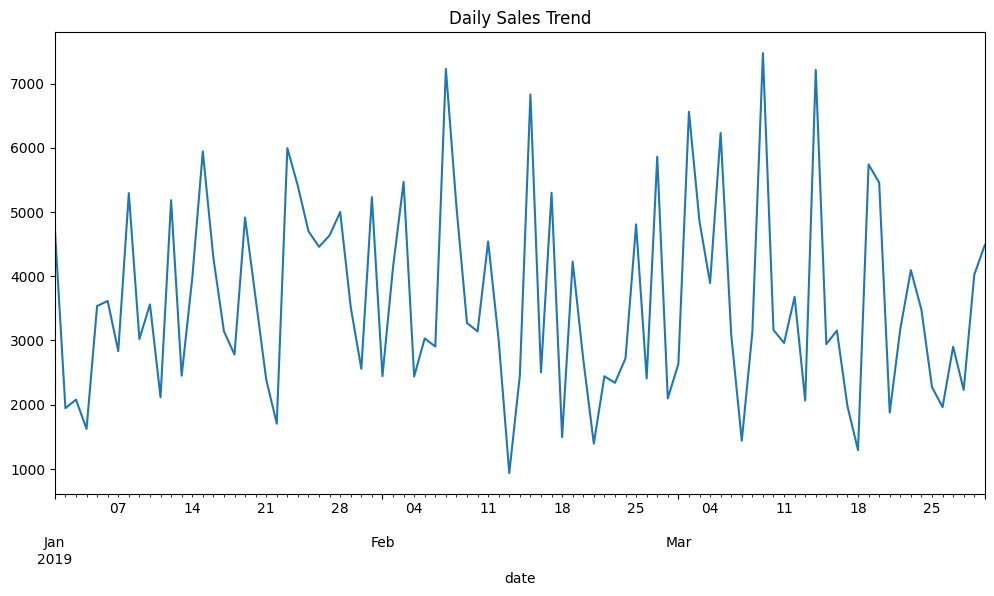

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date')['total'].resample('D').sum().plot(figsize=(12,6), title="Daily Sales Trend")
plt.show()


In [10]:
# Load the dataset
file_path = "/content/cleaned_supermarket_sales.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Overview:\n")
print(df.info())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5percent             1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_

The data wrangling process for this project involved systematically cleaning, transforming, and validating the Supermarket Sales Dataset obtained from Kaggle. The cleaning process included standardizing column names, converting date and time fields into appropriate formats, and checking for missing values and duplicates. No missing values or duplicate records were found, ensuring data integrity. Further transformations included extracting new features such as the day of the week and transaction hour to enhance analysis capabilities. After cleaning, the dataset was validated through Exploratory Data Analysis (EDA), which included summary statistics, distribution analysis of key numerical variables, and trend analysis of total sales over time. These checks confirmed that the dataset was complete, accurate, and suitable for further analysis. The final cleaned dataset was saved as cleaned_supermarket_sales.csv, making it ready for customer analytics and business intelligence applications.